In [1]:
import numpy as np 
import pandas as pd
import joblib
import seaborn
%matplotlib inline

In [2]:
data_train = pd.read_csv('../data/features.train.csv').set_index('id')
data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek,education,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,...,occupation_armed-forces,relationship_own-child,relationship_unmarried,relationship_not-in-family,relationship_husband,relationship_wife,relationship_other-relative,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
8548,0.869496,-2.099773,-0.329842,-0.230726,-0.053017,12.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25685,-0.729126,0.215614,-0.329842,-0.230726,-0.053017,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21888,1.668806,1.373307,-0.329842,-0.230726,-0.053017,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
15391,0.070185,-0.170284,-0.329842,-0.230726,-1.200624,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24388,-1.528436,-0.170284,-0.329842,-0.230726,2.242196,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.528436,-0.170284,-0.329842,-0.230726,-0.053017,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2192,0.070185,-0.170284,1.793965,-0.230726,-0.053017,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8250,-1.528436,-0.556182,-0.329842,-0.230726,-0.053017,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [3]:
model = joblib.load('./model/model.joblib')
model

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [4]:
feature_importance = pd.DataFrame({
    'feature_name': model.feature_names_in_,
    'feature_importance': model.feature_importances_,
})

feature_importance.sort_values(
    by = 'feature_importance', 
    ascending = False,
    inplace = True
)
feature_importance

,feature_name,feature_importance
31,relationship_husband,1.424595e-01
0,age-group,1.291709e-01
1,education-num,1.262232e-01
2,capitalgain,1.123593e-01
4,hoursperweek,6.054519e-02
5,education,5.582866e-02
32,relationship_wife,5.225606e-02
28,relationship_own-child,4.576742e-02
30,relationship_not-in-family,3.744586e-02
3,capitalloss,2.263627e-02


<Axes: xlabel='feature_importance', ylabel='feature_name'>

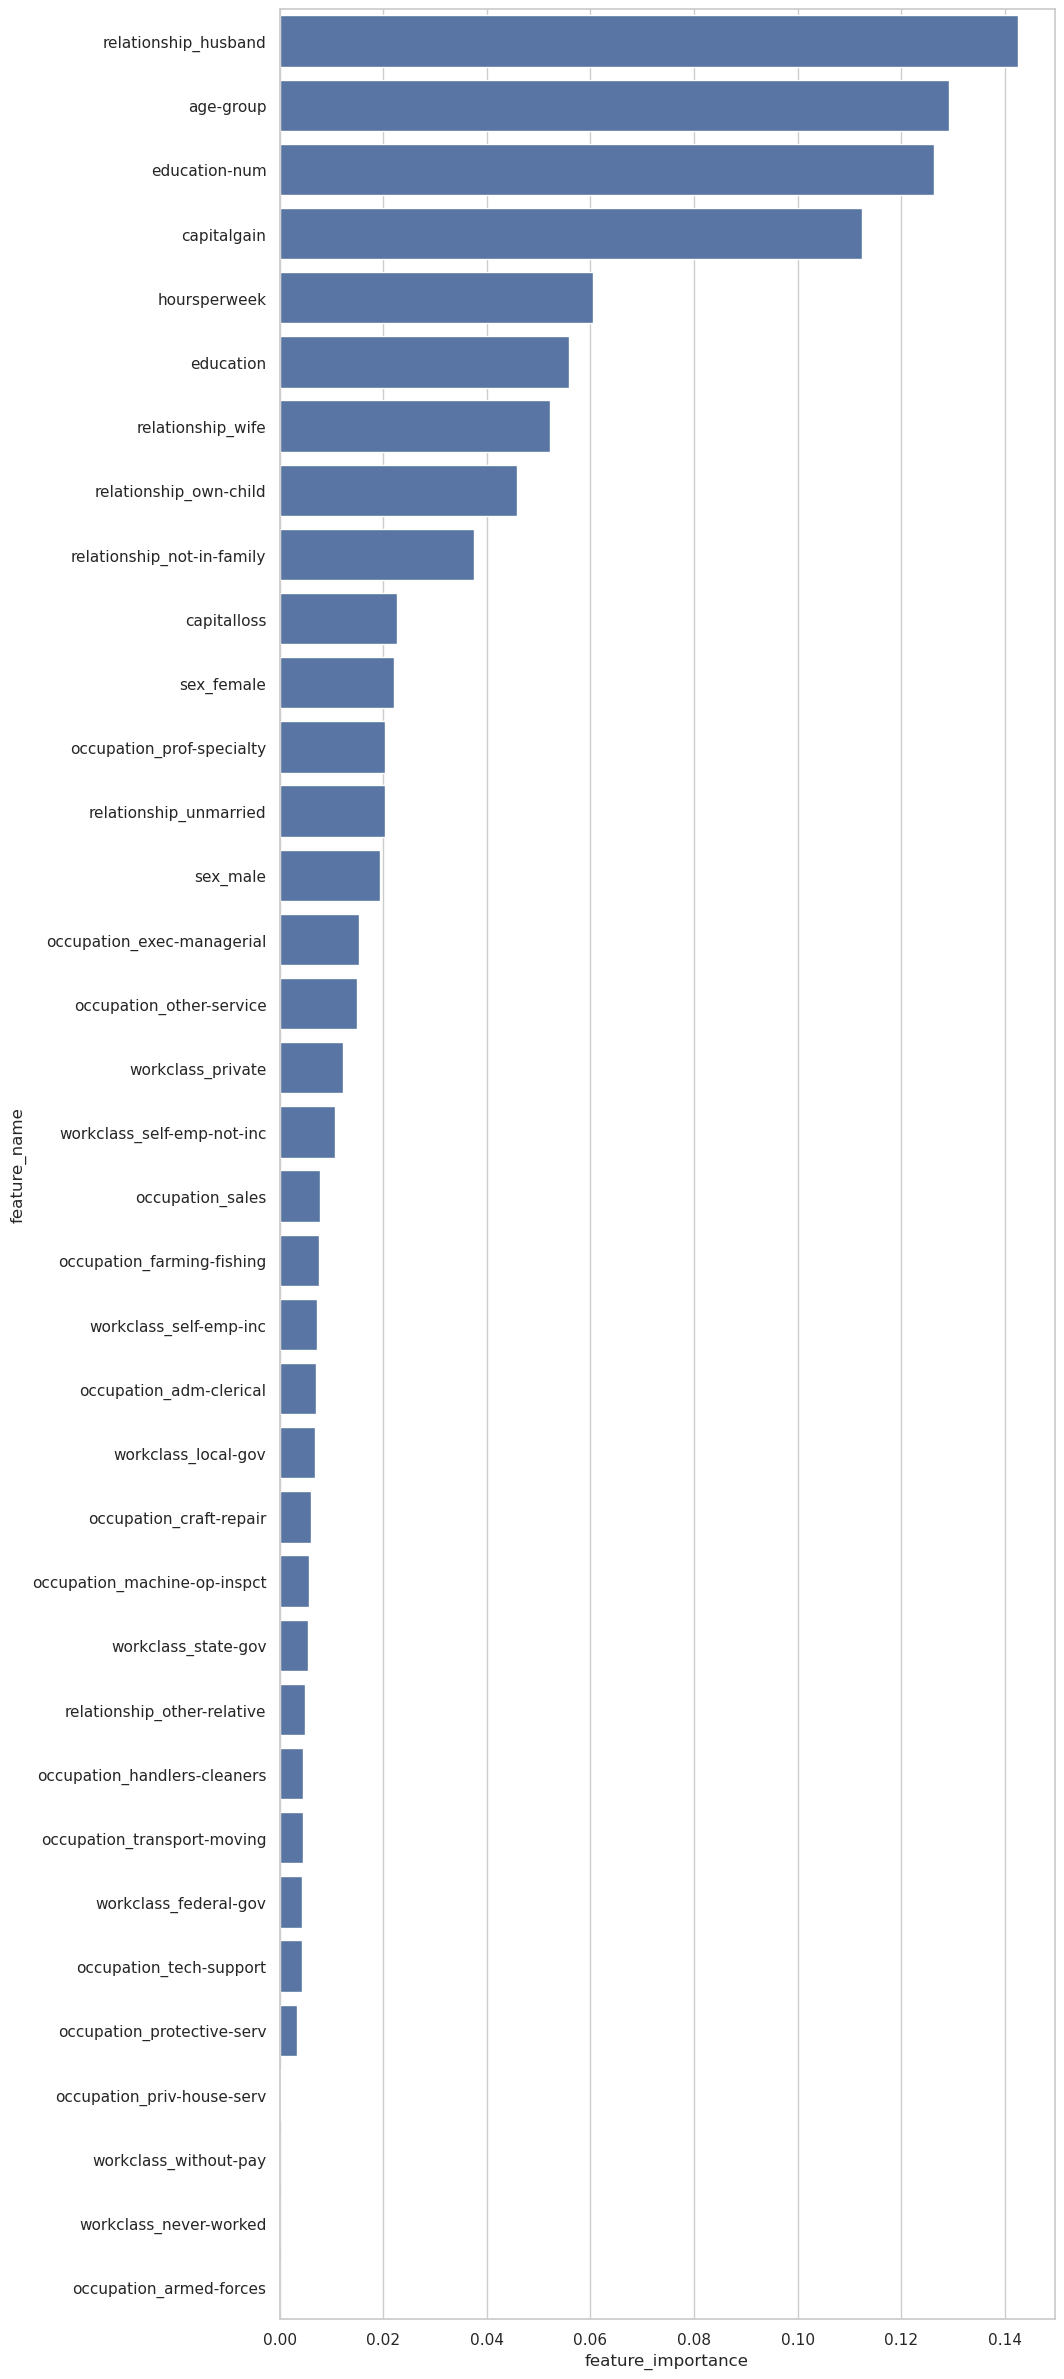

In [5]:
seaborn.set(
    style = 'whitegrid', 
    rc    = {'figure.figsize': (10, 30)}
)

seaborn.barplot(
    data=feature_importance,
    x='feature_importance', 
    y='feature_name'
)